In [1]:
import requests

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

Task 1. Retrieve current weather data for a list of cities (e.g., New York, London, Tokyo).

OpenWeatherMap APT Key

In [4]:
API_KEY = '9425be47a704404eea6e2ca5b09f27af'

In [5]:
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"

List of Cities to retrive weather data for

In [6]:
cities = ["New York","London","Tokyo"]

Function to retrieve weather data for a city

In [7]:
def get_weather (city):

    # construct the URL with the city and API key
    url = f"{BASE_URL}?q={city}&appid={API_KEY}&units=metric"  # Using 'metric' for Celsius
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200: #it means that the server successfully processed your request and returned the data in the expected format.
        # Extract relevant information
        city_name = data['name']
        temperature = data['main']['temp']
        weather = data['weather'][0]['description']
        humidity = data['main']['humidity']
        
        return city_name, temperature, weather, humidity
    else:
        print(f"Error retrieving data for {city}: {data.get('message', 'Unknown error')}")
        return None

url: This is the URL for the OpenWeatherMap API. It is created dynamically using Python's f-string formatting.

    BASE_URL: The base URL for the OpenWeatherMap weather API.
    {city}: This is where the city name is inserted dynamically.
    {API_KEY}: Your personal API key is inserted here for authentication.
    units=metric: This specifies that the temperature should be returned in Celsius. If you wanted Fahrenheit, you would use units=imperial

List to store weather data

In [8]:
weather_data = []

Retrieve weather data for each city

In [9]:
for city in cities:
    result = get_weather(city)
    if result:
        weather_data.append(result)


 Task 2. Store the data in a Pandas DataFrame with the following columns:

    City: The city name.
    Temperature: The current temperature.
    Weather: A brief description of the weather.
    Humidity: The humidity level.


In [10]:
df = pd.DataFrame(weather_data, columns=['City', 'Temperature', 'Weather', 'Humidity'])

In [11]:
df

,City,Temperature,Weather,Humidity
0,New York,3.52,clear sky,52
1,London,6.49,light rain,92
2,Tokyo,4.85,few clouds,51


Task 3. Create a bar chart showing the temperatures of the cities.

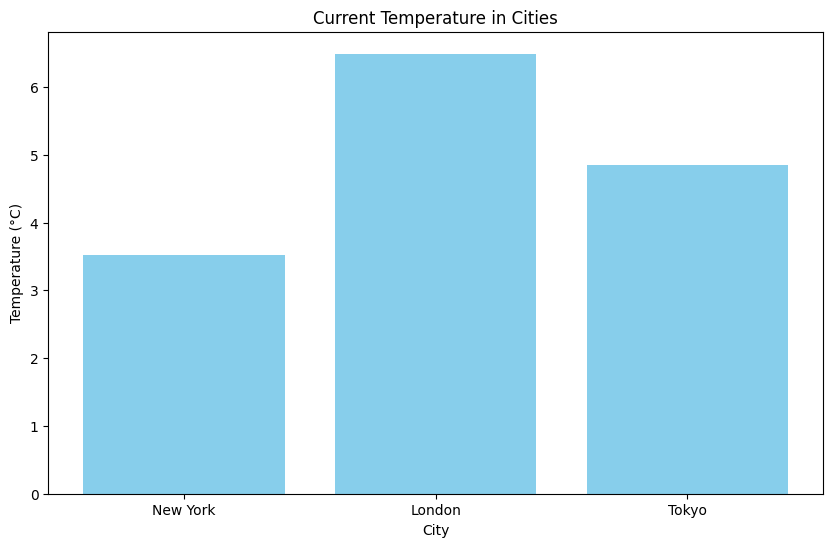

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['Temperature'], color= 'skyblue')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.title('Current Temperature in Cities')
plt.show()

Task 4. Identify and display the city with the highest and lowest temperatures.

In [13]:
highest_temp_city = df.loc[df['Temperature'].idxmax()]
lowest_temp_city = df.loc[df['Temperature'].idxmin()]

Print the results

In [14]:
print("\nCity with the highest temperature:")
print(f"{highest_temp_city['City']} with {highest_temp_city['Temperature']}°C")

print("\nCity with the lowest temperature:")
print(f"{lowest_temp_city['City']} with {lowest_temp_city['Temperature']}°C")


City with the highest temperature:
London with 6.49°C

City with the lowest temperature:
New York with 3.52°C
